# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels -q --user

In [2]:
# Import libraries
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Library to split data
from sklearn.model_selection import train_test_split

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# To build decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [3]:
# Mount personal Google drive
root_dir = '/content/drive'
drive.mount(root_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define the sub-directory where the data is located
drive_subdir = 'MyDrive/DataScienceCourse/Classification/Project'

# Define the name of the CSV file containing the dataset
file_name = 'INNHotelsGroup.csv'

# Construct the full path to the datafile
file_path = os.path.join(root_dir, drive_subdir, file_name)

# Load the datafile into a dataframe
raw_data = pd.read_csv(file_path)
data = raw_data.copy()

## Data Overview


In [5]:
# View the first few rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# View the last few rows of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [7]:
# Get the shape of the DataFrame
num_rows, num_cols = data.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 36275 rows and 19 columns.


In [8]:
# Get a summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# Get the breakdown of the dependent variable
data['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [10]:
# Check for any null-values or duplicates
num_nulls = data.isnull().sum().sum()
num_duplicates = data.duplicated().sum()
print(f"The DataFrame has {num_nulls} null values and {num_duplicates} duplicates.")

The DataFrame has 0 null values and 0 duplicates.


In [11]:
# Check for any features containing all unique values
for column in data.columns:
    if data[column].nunique() == data.shape[0]:
        print(f"Column '{column}' contains all unique values.")
        data.drop(column, axis=1, inplace=True)

Column 'Booking_ID' contains all unique values.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [12]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, units=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    if units is None:
      units = ''
    else:
      units = f' ({units})'

    fig, (ax_hist, ax_box) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.7, 0.3)},
        figsize=figsize
        )

    if bins:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          bins=bins
          )
    else:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          )

    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="yellow")
    ax_hist.grid(True)

    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        color='#555555',
        meanprops={
            'marker': (8, 1, 0),
            'markerfacecolor': 'red',
            'markeredgecolor': 'black',
            'markersize': 12,
            },
        medianprops={
            'linewidth': 1.5,
            'color': 'yellow'
            }
        )
    ax_box.set_xlabel(feature + units, fontsize=12)
    ax_box.grid(True)

    fig.suptitle(f"UVA Feature: {feature}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [13]:
# function to create labeled barplots

def labeled_barplot(data, feature, limit=None):

    col_len = len(data[feature])
    count = data[feature].nunique()
    if limit is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(limit + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Feature: {feature}', fontsize=16, fontweight='bold')
    ax = sns.countplot(data=data, x=feature, order=data[feature].value_counts().index[:limit])

    for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / col_len)  # percentage of each class of the category
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


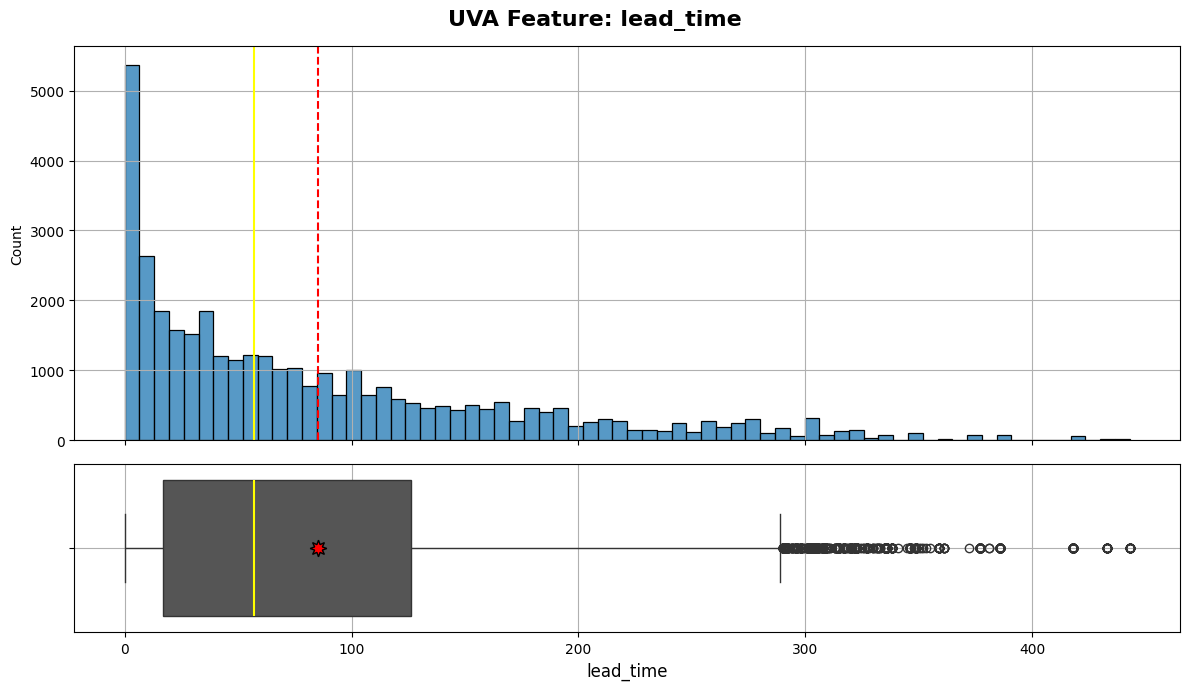

In [16]:
histogram_boxplot(data, "lead_time")

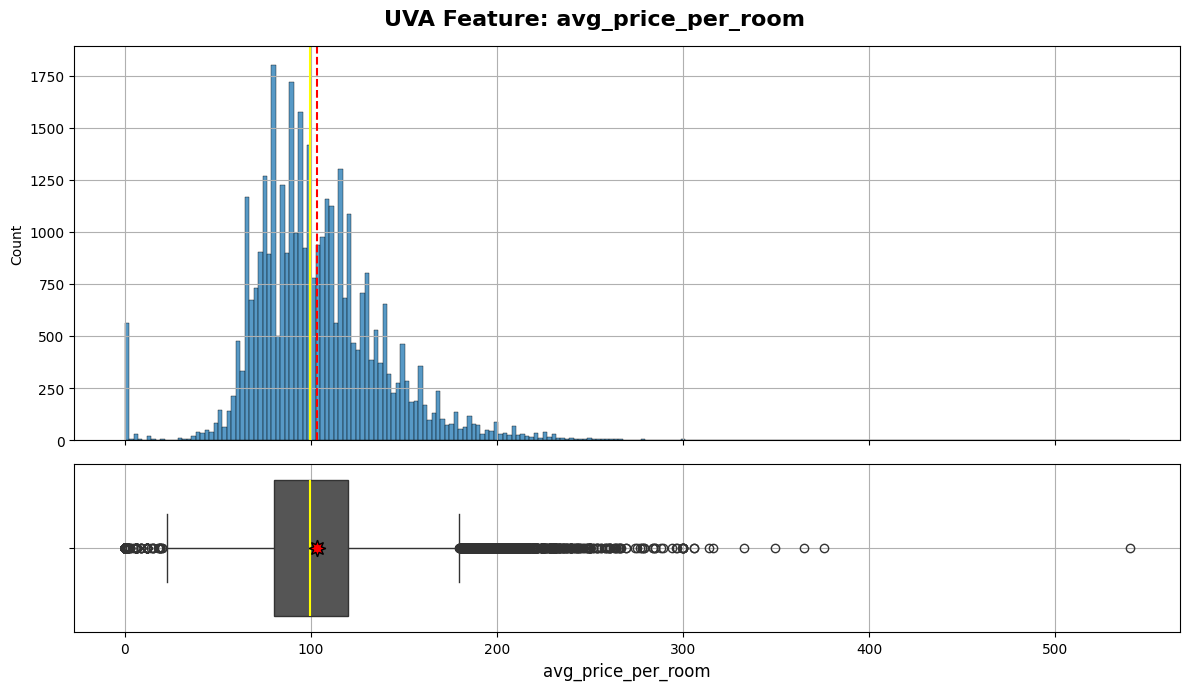

In [17]:
histogram_boxplot(data, "avg_price_per_room")

In [18]:
# Missing data is logged as $0. Let's impute with the sample median
data["avg_price_per_room"].replace([0], data["avg_price_per_room"].median(), inplace=True)

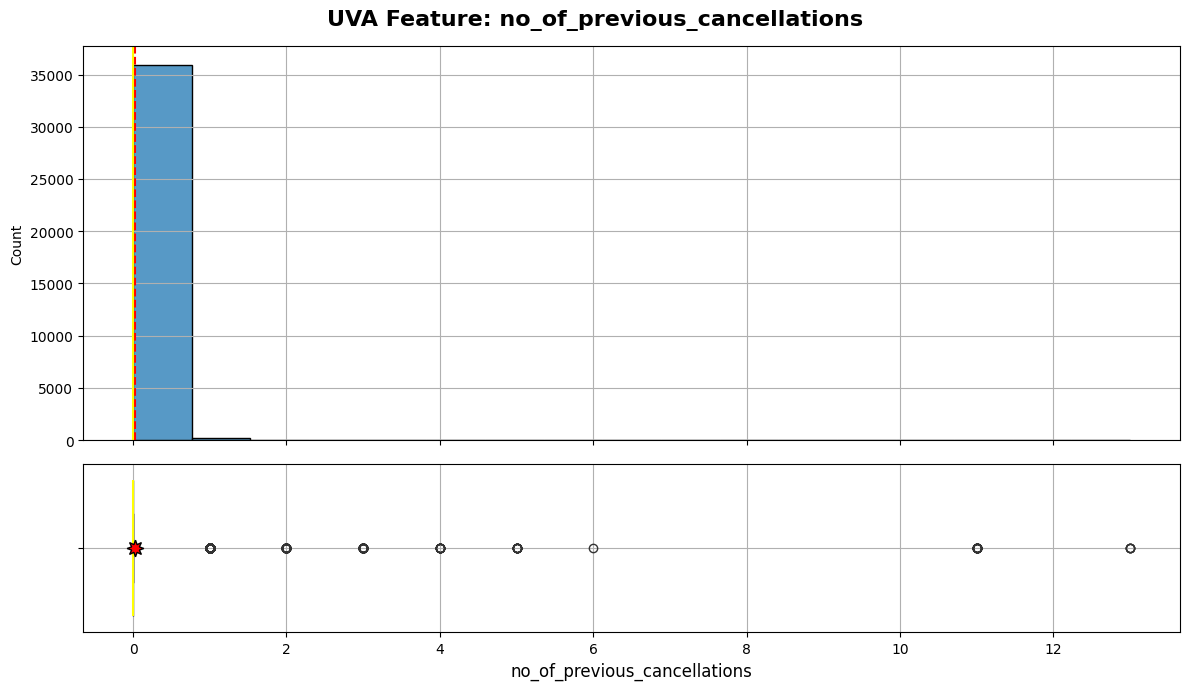

In [19]:
histogram_boxplot(data, "no_of_previous_cancellations")

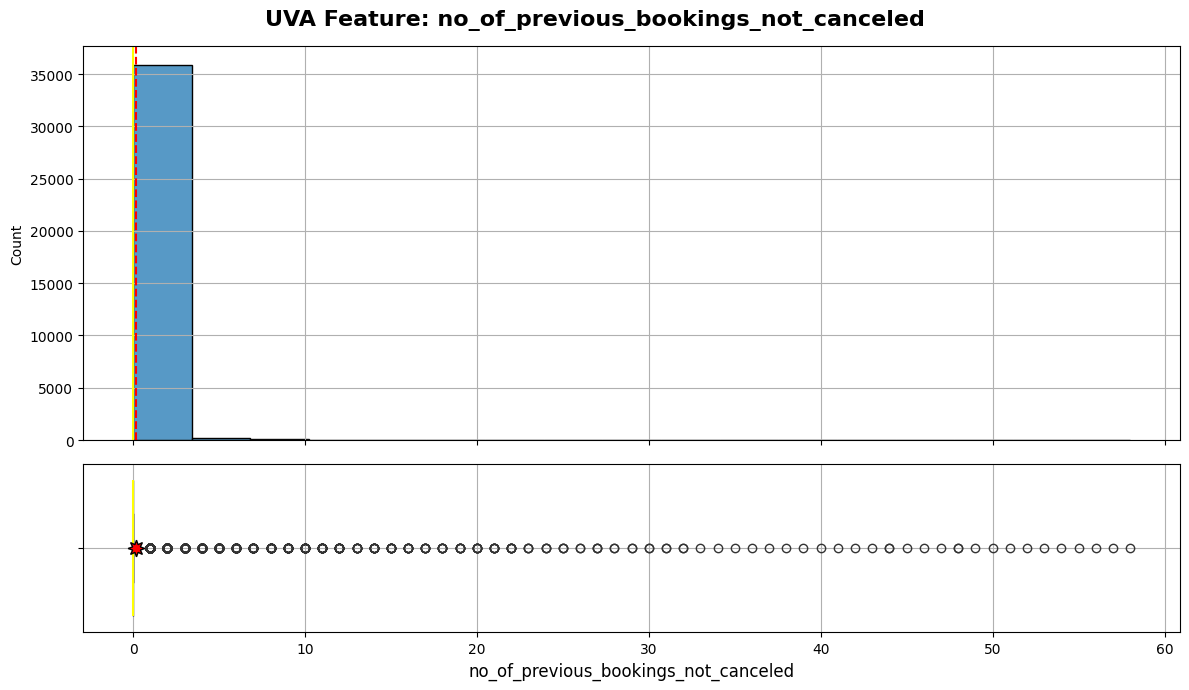

In [20]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

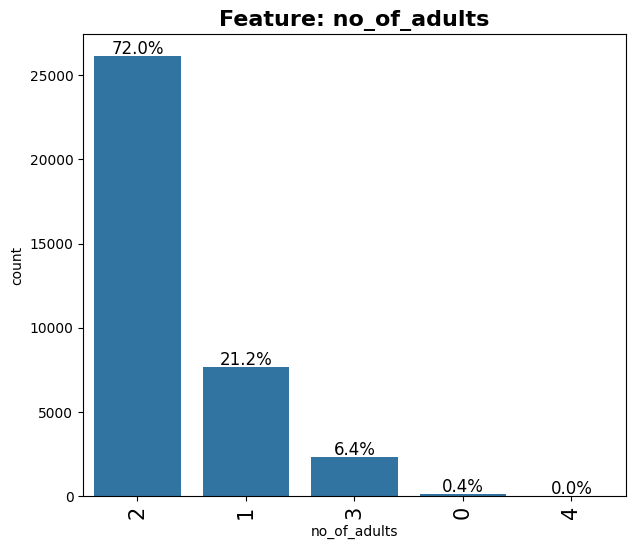

In [21]:
labeled_barplot(data, "no_of_adults")

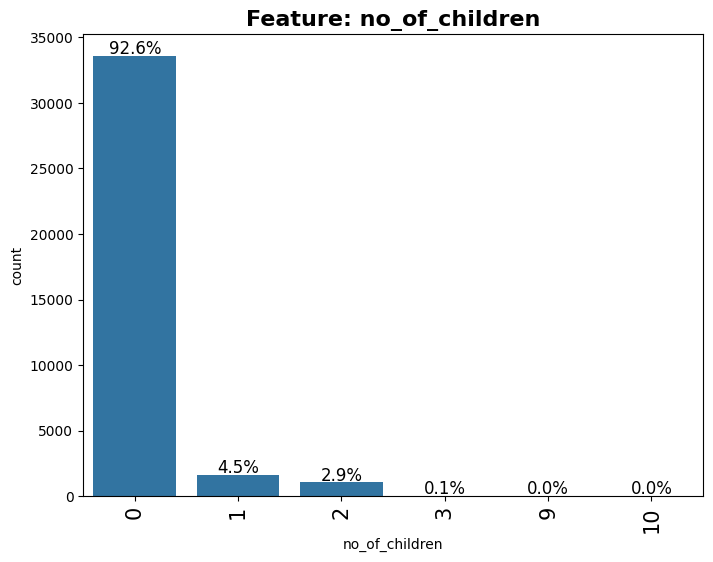

In [22]:
labeled_barplot(data, "no_of_children")

In [23]:
# Let's replace 9 and 10 children with 3, as these values look incorrect
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

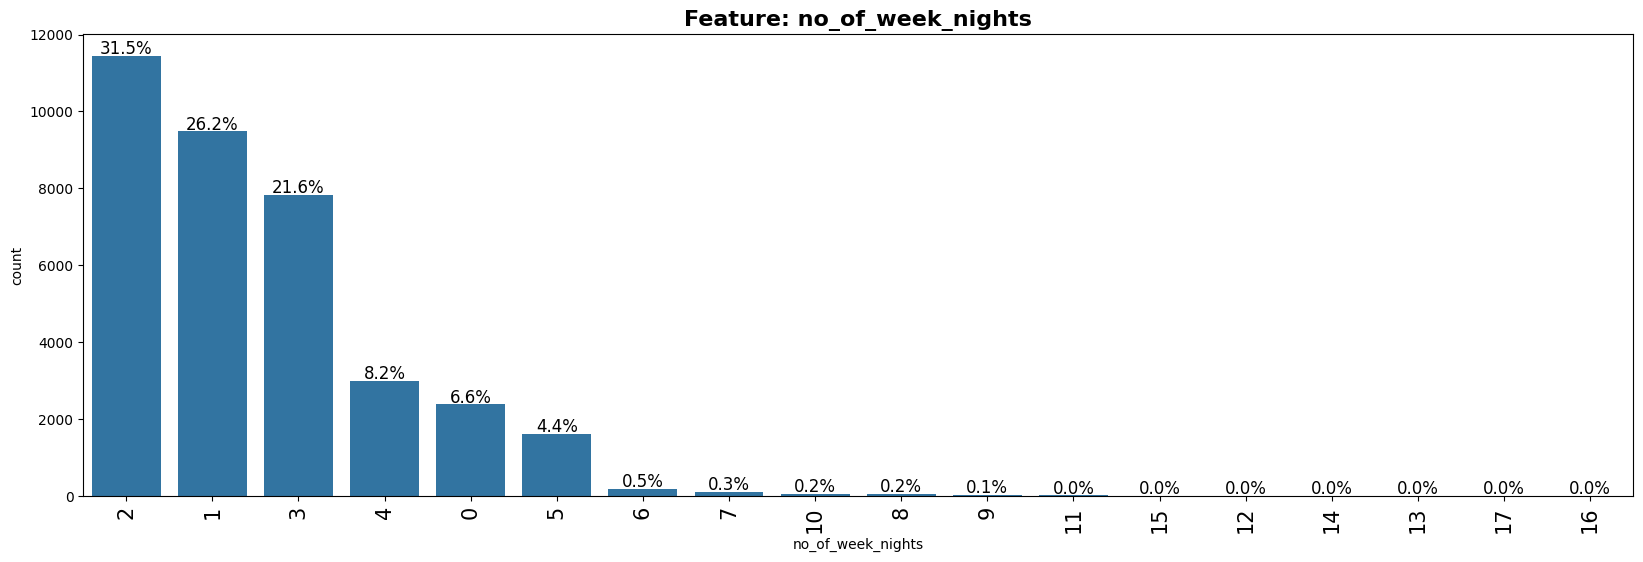

In [24]:
labeled_barplot(data, "no_of_week_nights")

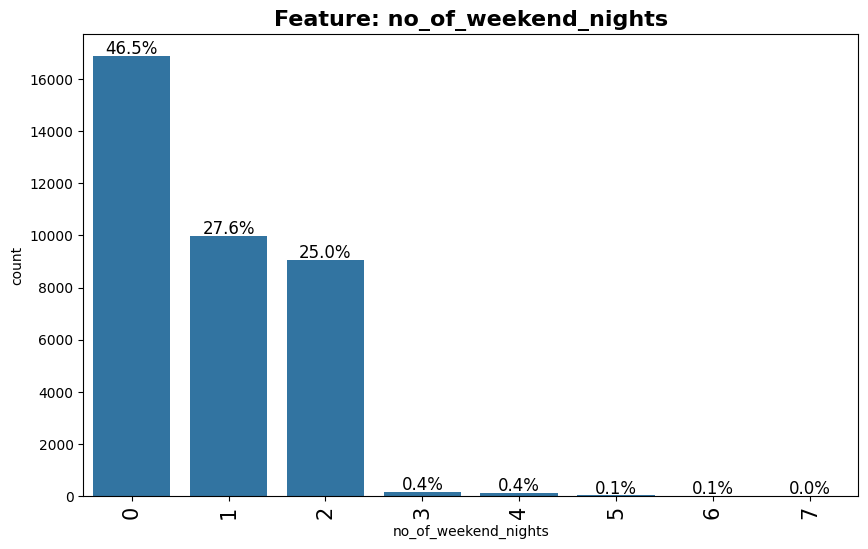

In [25]:
labeled_barplot(data, "no_of_weekend_nights")

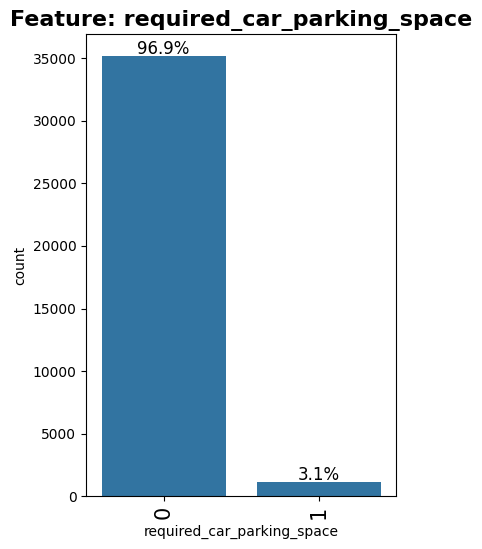

In [26]:
labeled_barplot(data, "required_car_parking_space")

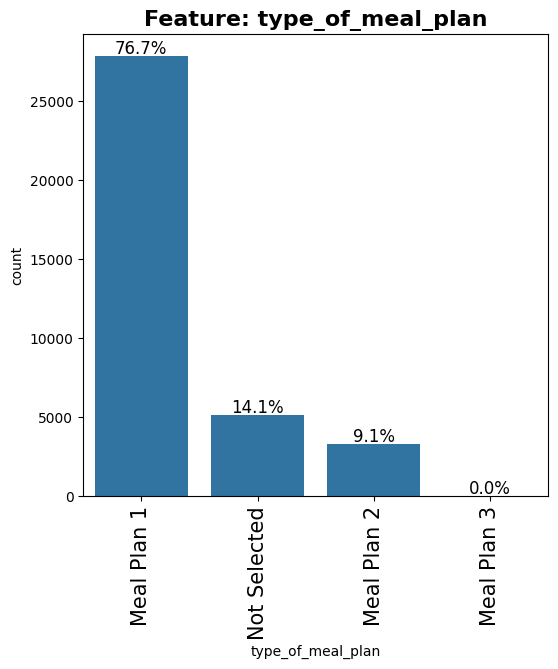

In [27]:
labeled_barplot(data, "type_of_meal_plan")

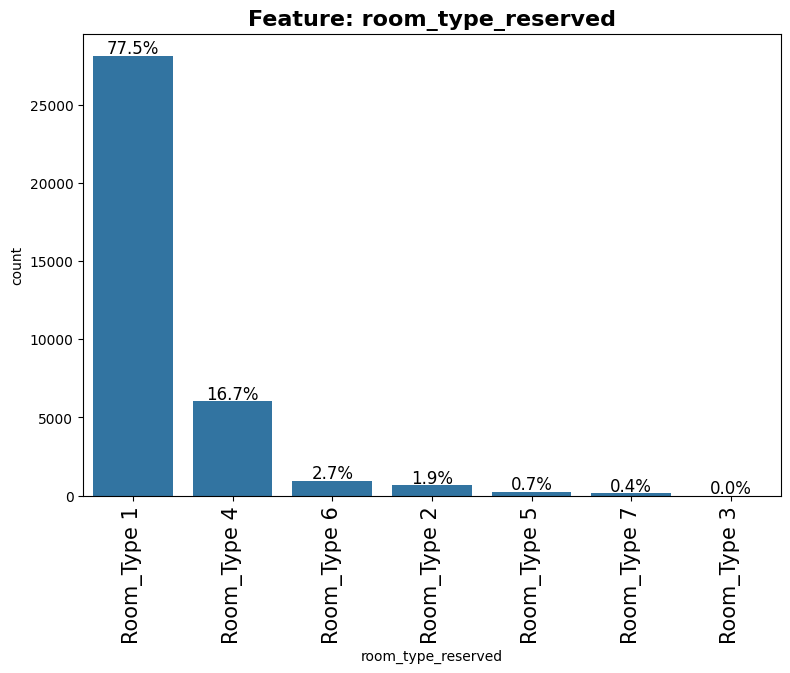

In [28]:
labeled_barplot(data, "room_type_reserved")

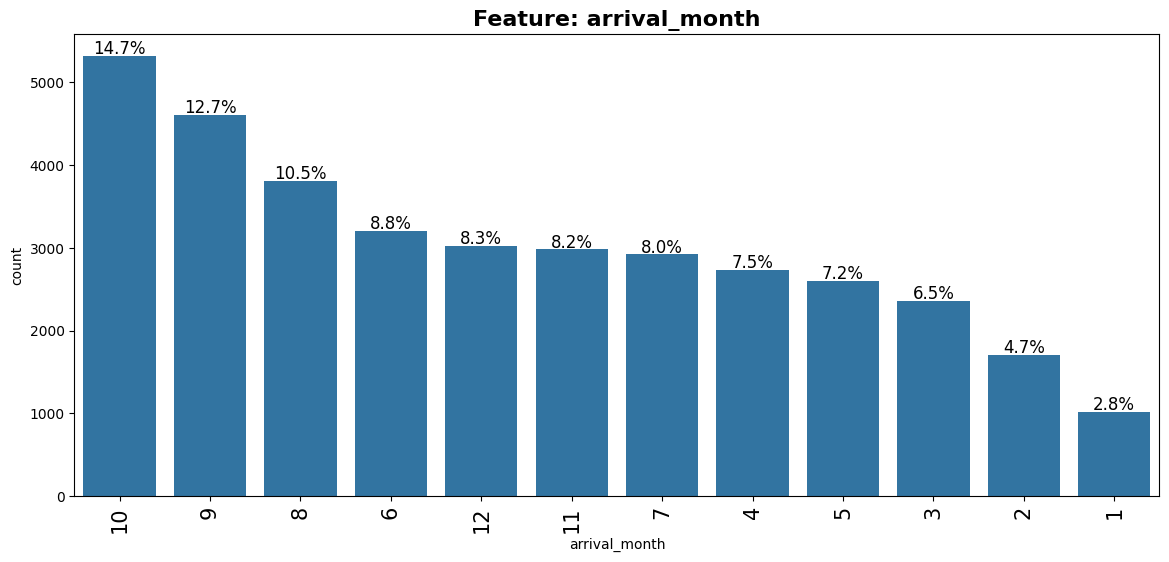

In [29]:
labeled_barplot(data, "arrival_month")

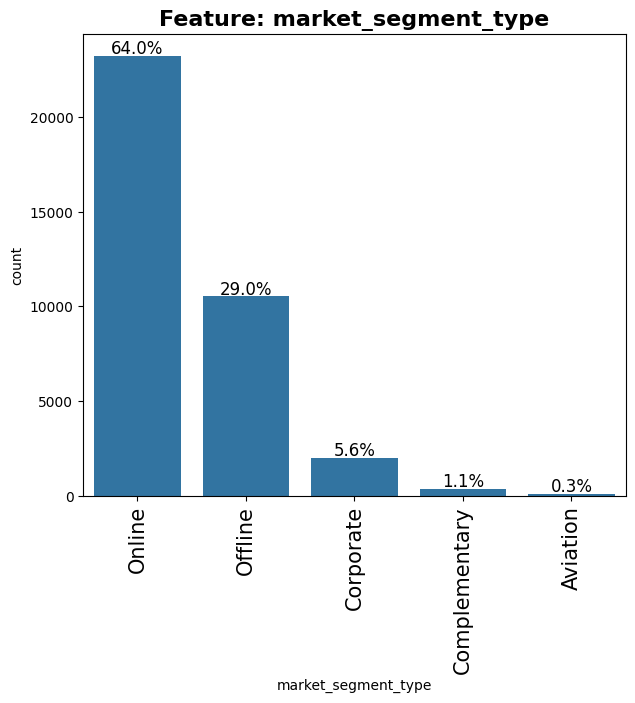

In [30]:
# Question 2
labeled_barplot(data, "market_segment_type")

Question 2:  Most guests come from the Online market segment

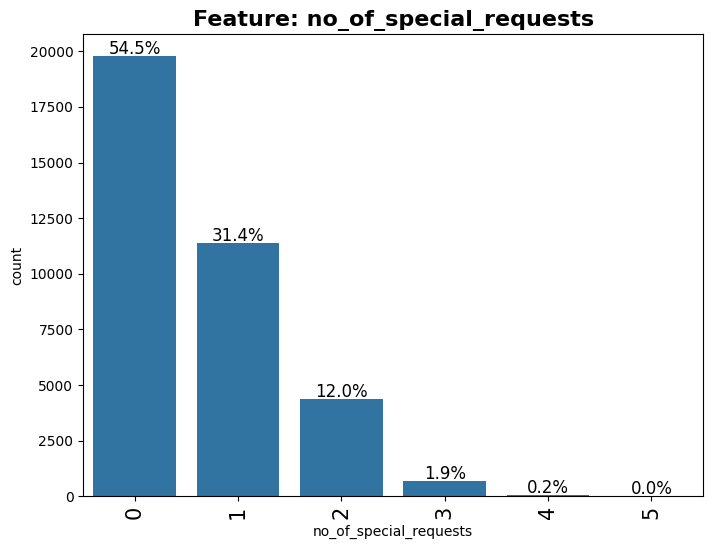

In [31]:
labeled_barplot(data, "no_of_special_requests")

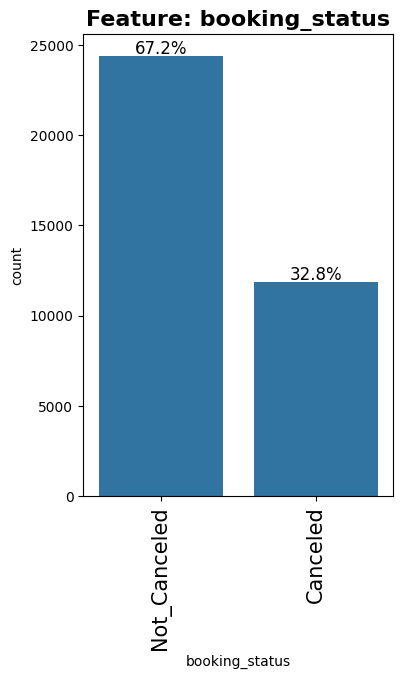

In [32]:
# Question 4
labeled_barplot(data, "booking_status")

Question 4: 32.8% of bookings are canceled

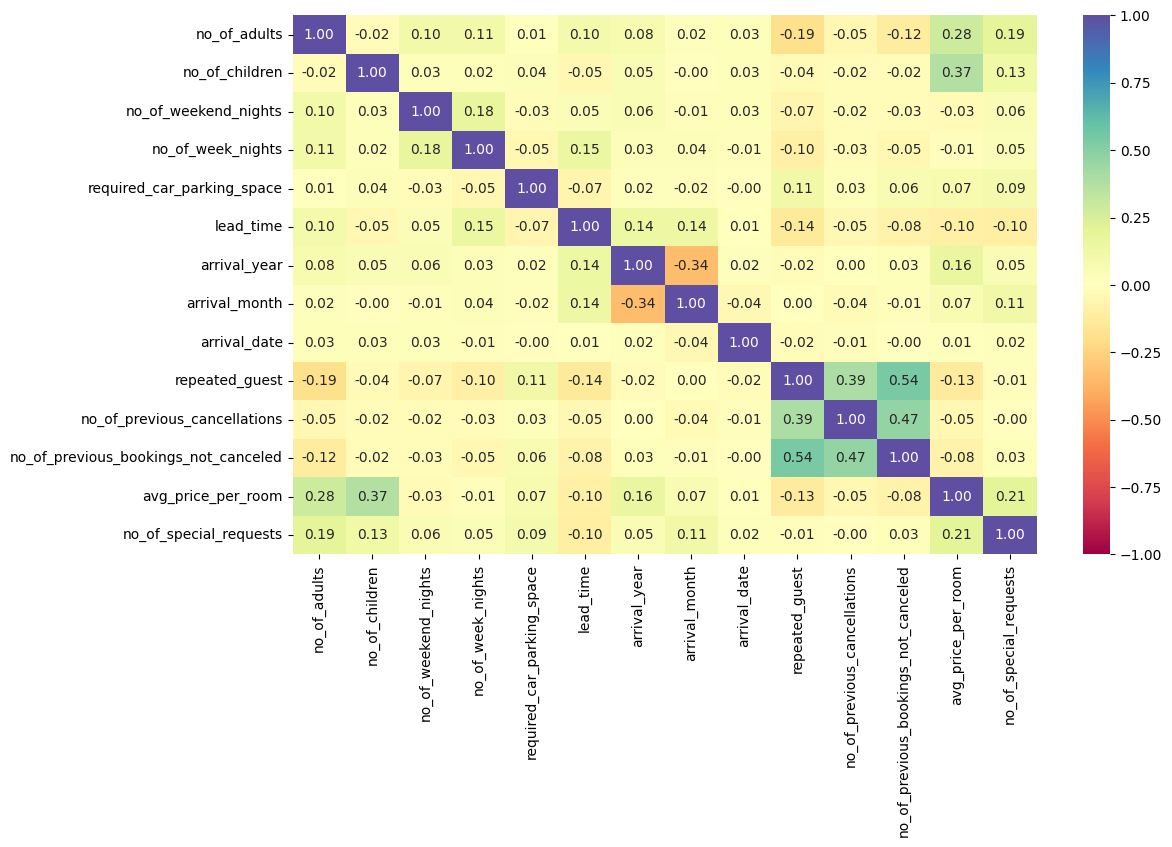

In [33]:
# General Heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

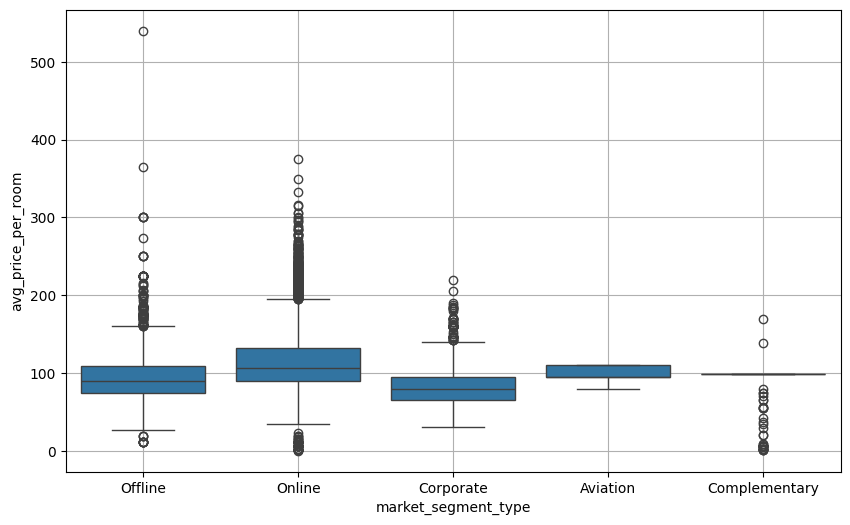

In [34]:
# Question 3
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.grid(True)
plt.show()

Question 3: Price per room is relatively independent of market segment

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


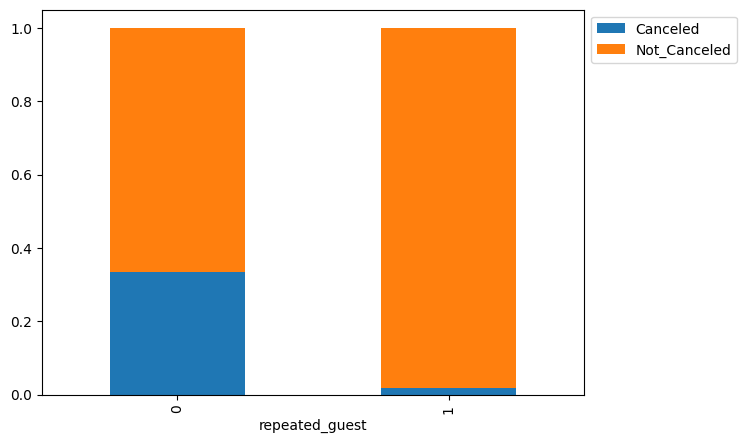

In [35]:
# Question 5
stacked_barplot(data, "repeated_guest", "booking_status")

In [36]:
perc_repeat_canceled = 100 * 16 / 930
print(f"The percentage of repeated guests that cancel is {perc_repeat_canceled:.2f}%")

The percentage of repeated guests that cancel is 1.72%


Question 5: About 1.72% of repeated guests cancel the booking

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


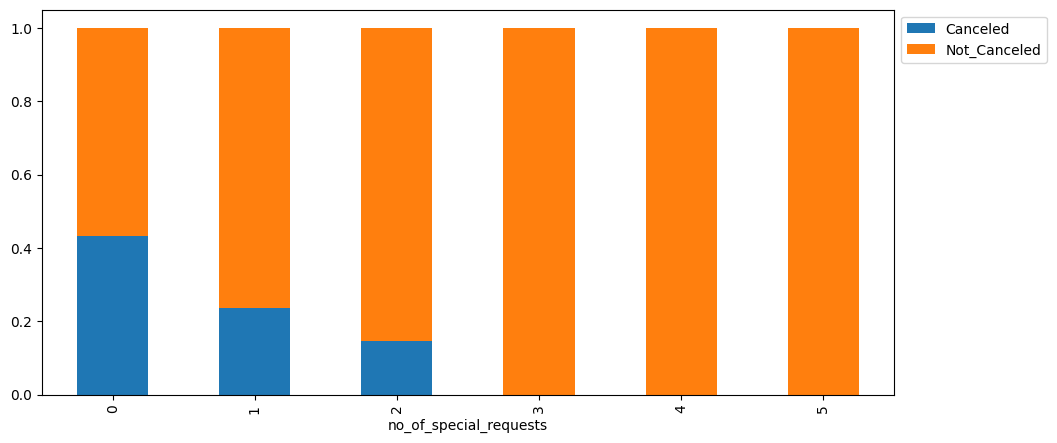

In [37]:
# Question 6
stacked_barplot(data, "no_of_special_requests", "booking_status")

Question 6: Guests with more special requests tend to cancel less than guests with less or no special requests

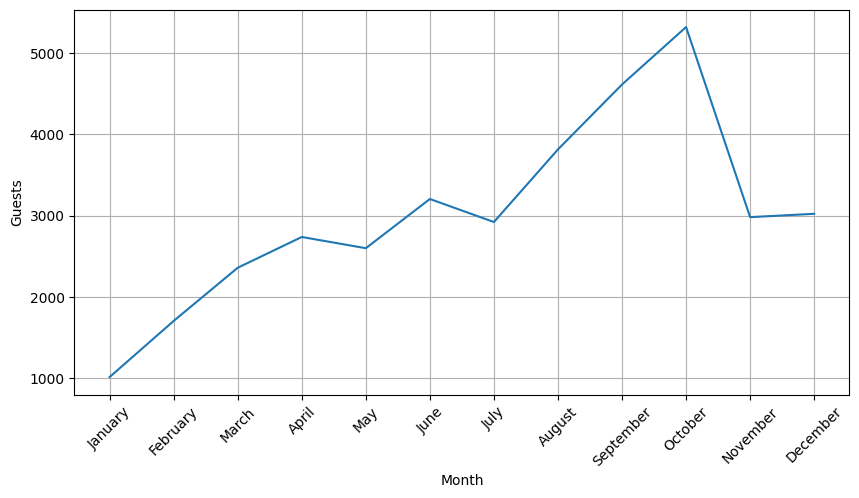

In [38]:
# Question 1
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.xticks(monthly_data["Month"], months, rotation=45)
plt.grid()
plt.show()

Question 1: October is the busiest month

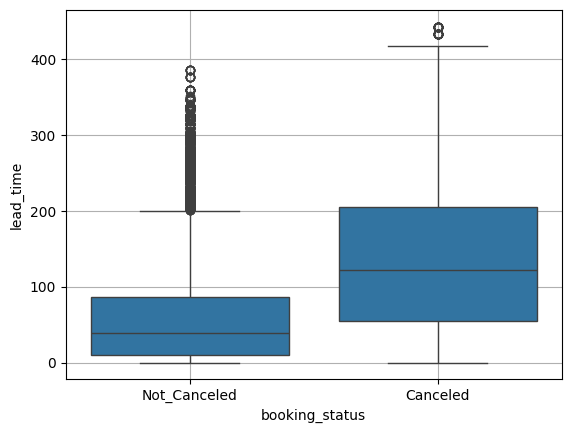

In [39]:
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.grid(True)
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [40]:
# Convert object feature types to Categorical types
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [41]:
# Inspect the contents of all categorical features
categorical_columns = data.select_dtypes(include=['category']).columns
print("----------------------------")
print("Categorical Column Summaries")
print("----------------------------")
categorical_feature_names = []
for i, categorical_column in enumerate(categorical_columns, start=1):
    categorical_feature_names.append(categorical_column)
    print(f"\n({i}) {categorical_column.upper()}:")
    print(data[categorical_column].value_counts())

----------------------------
Categorical Column Summaries
----------------------------

(1) TYPE_OF_MEAL_PLAN:
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

(2) ROOM_TYPE_RESERVED:
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

(3) MARKET_SEGMENT_TYPE:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

(4) BOOKING_STATUS:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [42]:
# Replace booking_status with integer values
data['booking_status'] = data['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})

In [43]:
# Splitting the data into a 70/30 training/testing set
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [44]:
# Checking the VIF
vif_series = pd.Series([variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])], index=X_train.columns, dtype=float)
vif_series.sort_values(ascending=False, inplace=True)
vif_series.drop('const', inplace=True)
vif_series

,0
market_segment_type_Online,69.493484
market_segment_type_Offline,62.514529
market_segment_type_Corporate,16.636511
market_segment_type_Complementary,4.175401
no_of_children,2.085544
room_type_reserved_Room_Type 6,2.064628
avg_price_per_room,1.956758
repeated_guest,1.749587
no_of_previous_bookings_not_canceled,1.570773
arrival_year,1.429762


We can see we have a few features with a high VIF (> 5). We can remove these iteratively to ensure we retain as much useable information as possible.

In [45]:
# Drop high-VIF features one at a time
while True:
    max_vif = vif_series.max()
    if max_vif <= 5:
        break
    max_vif_feature = vif_series.idxmax()
    print(f"Removing {max_vif_feature} with VIF {max_vif}")
    X_train.drop(max_vif_feature, axis=1, inplace=True)
    X_test.drop(max_vif_feature, axis=1, inplace=True)
    vif_series = pd.Series([variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])], index=X_train.columns, dtype=float)
    vif_series.drop('const', inplace=True)

# Print the remaining features
vif_series.sort_values(ascending=False, inplace=True)
vif_series

Removing market_segment_type_Online with VIF 69.49348404581174


,0
no_of_children,2.084608
room_type_reserved_Room_Type 6,2.064114
avg_price_per_room,1.955462
repeated_guest,1.746491
market_segment_type_Offline,1.631416
no_of_previous_bookings_not_canceled,1.570434
market_segment_type_Corporate,1.543314
arrival_year,1.426849
lead_time,1.404002
room_type_reserved_Room_Type 4,1.358396


## Building a Logistic Regression model

In [46]:
# Create the baseline model
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()
logit = sm.Logit(y_train, X_train_lr.astype(float))
lg = logit.fit(disp=0)

In [47]:
# Get a summary of the model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.3298
Time:                        01:45:19   Log-Likelihood:                -10764.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -952.6574    121.042     -7.870      0.000   -1189.895    -715.420
no_of_adults                             0.0526      

## Model performance evaluation

In [48]:
# Make predictions on the training set
pred_train = lg.predict(X_train_lr.astype(float)) > 0.5
pred_train = np.round(pred_train)

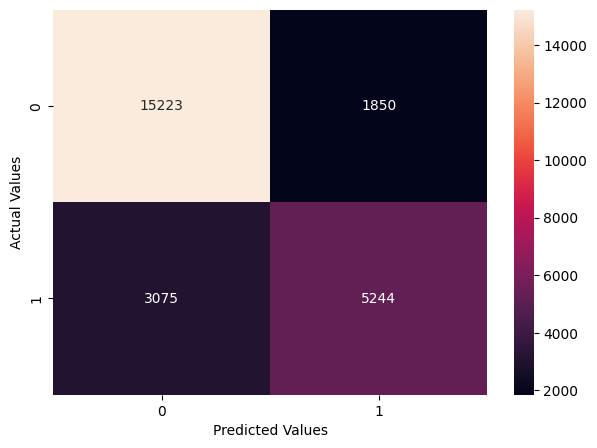

In [49]:
# Plot a confusion matrix
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [50]:
# Quantify the accuracy of the model before dropping least-significant features
pre_accuracy = accuracy_score(y_train, pred_train)
print(f"Accuracy on training set: {pre_accuracy}")

Accuracy on training set: 0.8060412728418399


In [51]:
# Dropping high P-Values
while True:
    max_pvalue = lg.pvalues.max()
    if max_pvalue <= 0.05:
        break
    max_pvalue_feature = lg.pvalues.idxmax()
    print(f"Removing {max_pvalue_feature} with P-Value {max_pvalue}")
    X_train_lr.drop(max_pvalue_feature, axis=1, inplace=True)
    X_test_lr.drop(max_pvalue_feature, axis=1, inplace=True)
    logit = sm.Logit(y_train, X_train_lr.astype(float))
    lg = logit.fit(disp=0)
    pred_train = lg.predict(X_train_lr.astype(float)) > 0.5
    pred_train = np.round(pred_train)


Removing type_of_meal_plan_Meal Plan 3 with P-Value 1.0


/root/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removing market_segment_type_Complementary with P-Value 0.9988894125393192
Removing room_type_reserved_Room_Type 3 with P-Value 0.9676453328913516
Removing no_of_children with P-Value 0.16314986047218327
Removing no_of_adults with P-Value 0.1267579774418928
Removing no_of_previous_bookings_not_canceled with P-Value 0.11984997023006831
Removing arrival_date with P-Value 0.12229581789884438


In [52]:
# Re-compute the accuracy of the model
post_accuracy = accuracy_score(y_train, pred_train)
print(f"Accuracy on training set ..... {post_accuracy:.5f}")
print(f"Accuracy decrease ............ {pre_accuracy - post_accuracy:.5f}")

Accuracy on training set ..... 0.80584
Accuracy decrease ............ 0.00020


## Final Model Summary

In [53]:
# Print the remaining features
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.3273
Time:                        01:45:25   Log-Likelihood:                -10804.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -952.5089    120.545     -7.902      0.000   -1188.773    -716.245
no_of_weekend_nights               0.1551      0.020      7.851      0.

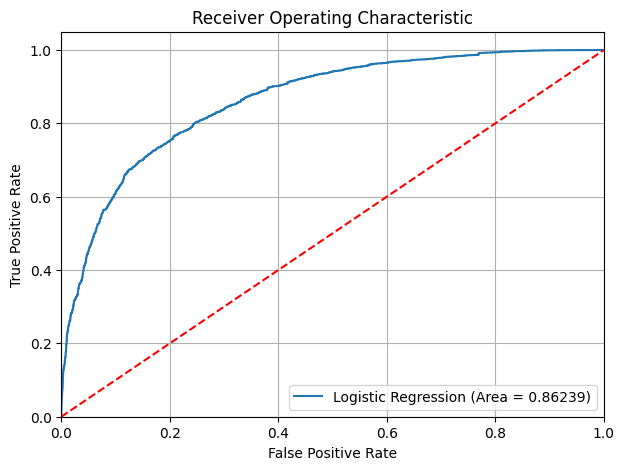

In [54]:
# Compute and plot the ROC curve for the Model
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train_lr.astype(float)))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train_lr.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (Area = {logit_roc_auc_train:.5f})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [55]:
# Comput the accuracy of the model on test and training sets
pred_test = lg.predict(X_test_lr.astype(float)) > 0.5
pred_test = np.round(pred_test)

In [56]:
print(f"Accuracy on training set ..... {post_accuracy}")
print(f"Accuracy on test set ......... {accuracy_score(y_test, pred_test)}")

Accuracy on training set ..... 0.8058443604284814
Accuracy on test set ......... 0.8021685197096389


## Building a Decision Tree model

In [57]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Recall on training set ........... {metrics.recall_score(y_train,pred_train):.5f}")
    print(f"Recall on test set ............... {metrics.recall_score(y_test,pred_test):.5f}")

In [59]:
# Create a decistion tree model using copies of the original data split
X_train_dt = X_train.copy()
X_test_dt = X_test.copy()
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train_dt, y_train)

DecisionTreeClassifier(random_state=1)

In [60]:
# Compute the accuracy and recall scores on the test and training sets
print(f"Accuracy on the training set ..... {dtree.score(X_train_dt, y_train):.5f}")
print(f"Accuracy on the test set ......... {dtree.score(X_test_dt, y_test):.5f}")
get_recall_score(dtree)

Accuracy on the training set ..... 0.99437
Accuracy on the test set ......... 0.86456
Recall on training set ........... 0.98570
Recall on test set ............... 0.78912


## Do we need to prune the tree?

There exists a large discrepency between our training and test set. Our model is over-fitting due to the lack of restrictions imparted. We can prune our decision tree in a variety of ways. For this project we will use a grid search technique to optimize the hyper-parameters used to contruct our tree.

In [61]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1, 10),
              'max_leaf_nodes' : [2, 3, 5, 10, 20],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

## Model Performance Comparison and Conclusions

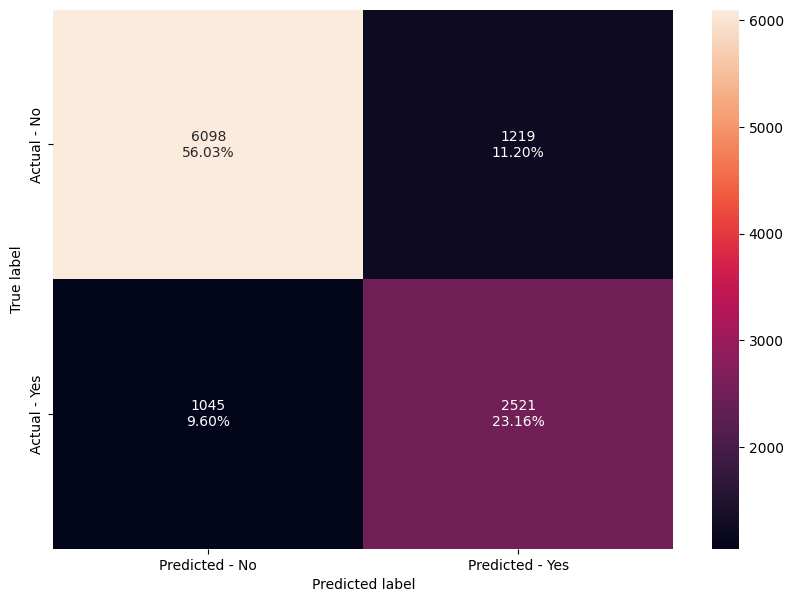

In [62]:
# Create a confusion matrix for the grid-search best estimator
make_confusion_matrix(estimator, y_test)

In [63]:
# Accuracy on train and test
print(f"Accuracy on training set ......... {estimator.score(X_train, y_train):.5f}")
print(f"Accuracy on test set ............. {estimator.score(X_test, y_test):.5f}")

# Recall on train and test
get_recall_score(estimator)

Accuracy on training set ......... 0.79340
Accuracy on test set ............. 0.79197
Recall on training set ........... 0.71307
Recall on test set ............... 0.70695


Much better agreement between test and training sets!

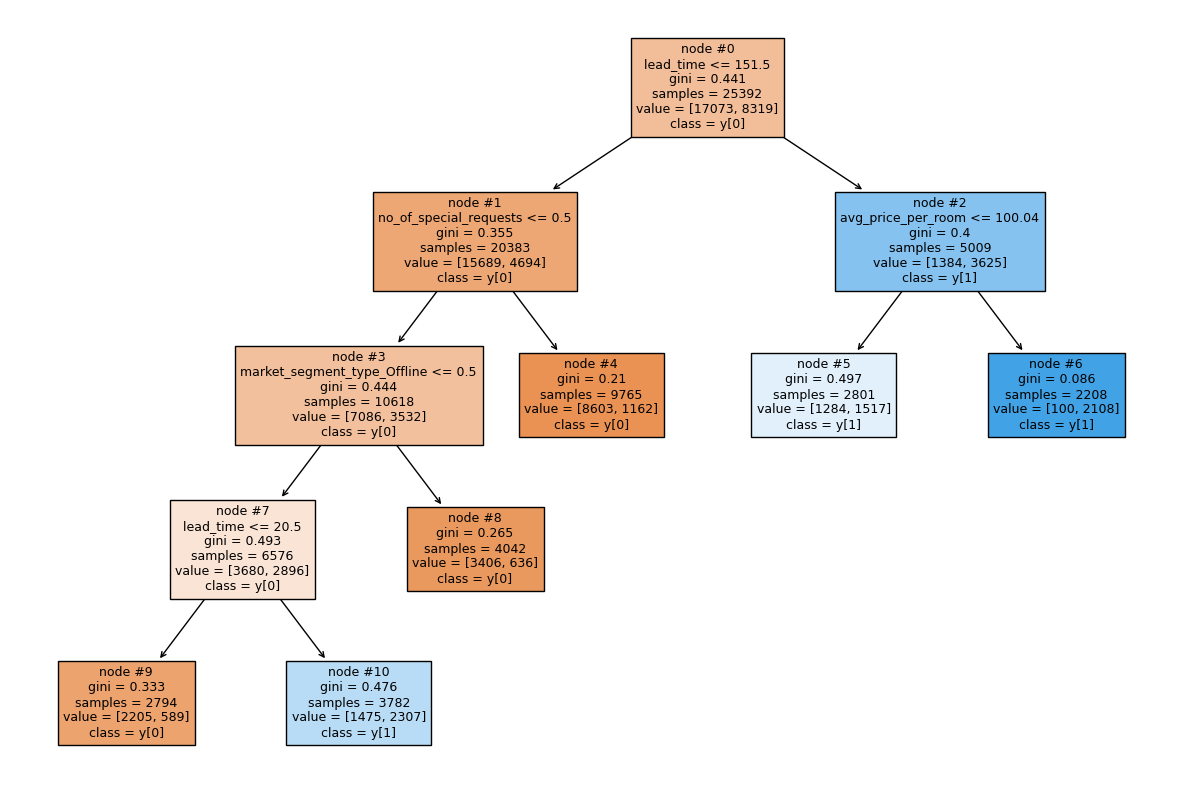

In [64]:
# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(estimator, feature_names=list(X.columns), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

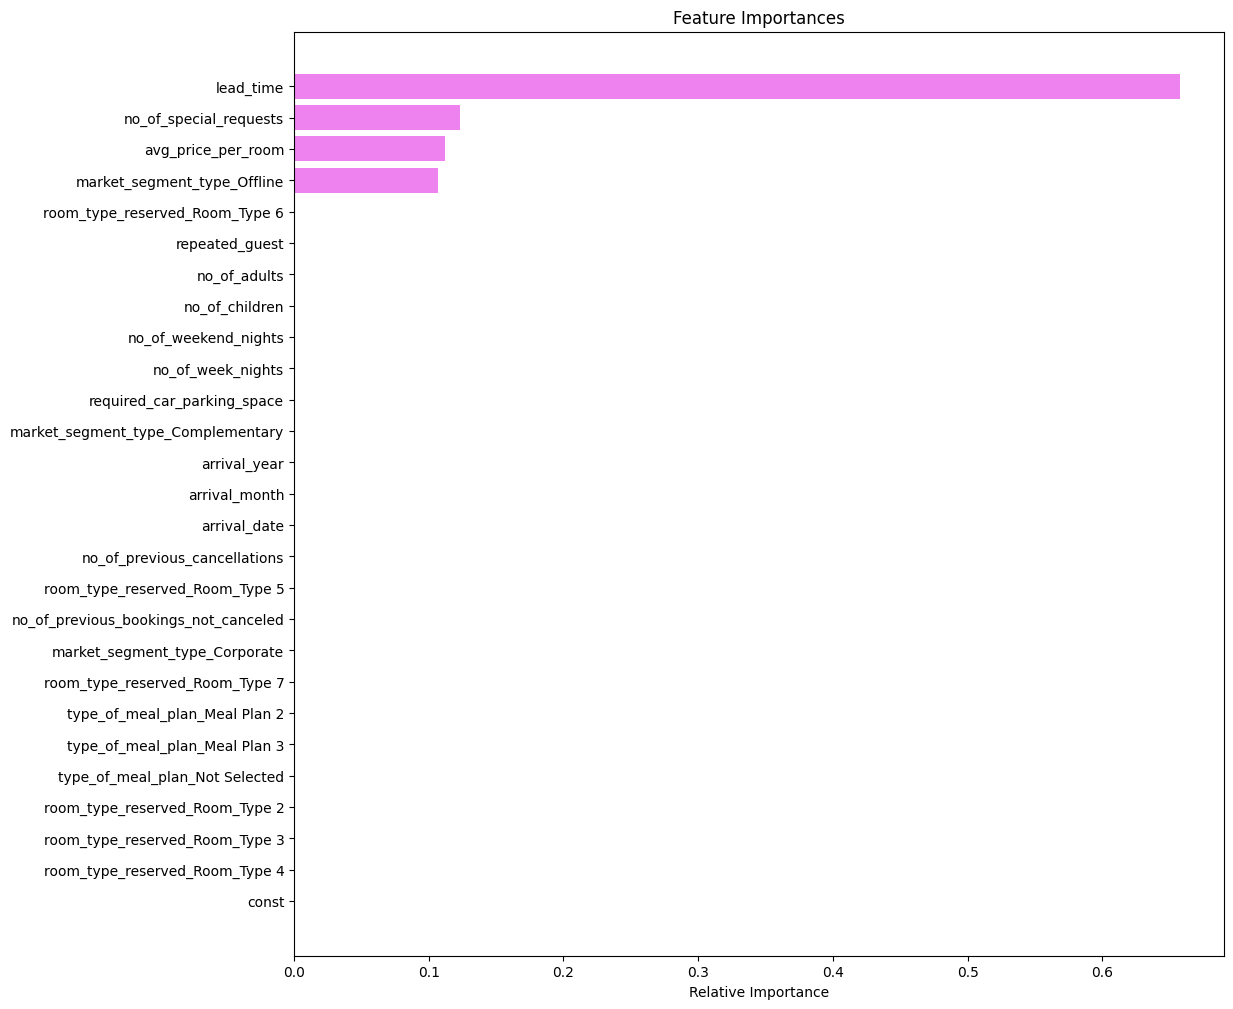

In [65]:
# Compute and plot the importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

From our decision tree model, we can see that the largest factor in cancelations is lead time. Specifically, those who book further out have a much higher liklihood of cancelation than those who book closer to their planned stay. Guests who make special requests also tend to cancel less.

I would reccomend the hotel set-up an automated service to reach out to guests who booked greater than ~150 days out from their planned stay a few weeks before their booking to confirm they still plan on coming. Getting last-minute cancelations to occur earlier can help the hotel re-fill these rooms with other, more serious, customers.